![](https://mivia.unisa.it/onfire2023/assets/img/iciap_logo.jpg)
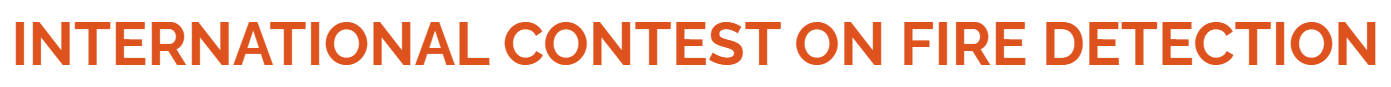

Dear Participant,

Thanks for your participation to ONFIRE Contest 2023.

Please download the following files:
- Training videos: https://drive.google.com/file/d/1tEz2wVQjPp1MjVHZLa-Z3uyVBnwljgGF/view?usp=sharing
- Training annotations: https://drive.google.com/file/d/123AcAQCldRNE6iKpXuCaVtsaR3uHIOeN/view?usp=sharing
- Code example: https://drive.google.com/file/d/1rXMCtpus2i2UDdSBD9RwWAxnT0wrrXOk/view?usp=sharing

Please remind that:
- The deadline for the submission of the methods is 21st July, 2023. The submission must be done with an email in which the participants share (directly or with external links) the trained model, the code and the report. The participants can receive the training set and its annotations by sending an email to onfire2023@unisa.it, in which they also communicate the name of the team.
- The participants can use these training samples and annotations, but also additional videos.
- The participants must submit their trained model and their code by carefully following the detailed instructions reported in the website.
- The participants are strongly encouraged to submit a contest paper to ICIAP 2023, whose deadline is 28th July, 2023. The contest paper must be also sent by email to the organizers. Otherwise, the participants must produce a brief PDF report of the proposed method.
- The detailed instructions of the proposed method can be downloaded here: https://mivia.unisa.it/onfire2023/

In [ ]:
# Import the drive module from the google.colab package
from google.colab import drive

# Mount Google Drive into the Colab environment at the specified path
drive.mount('/content/drive')

## Training with YOLOv5

### Step 1: Install Requirements

The following code operates within a Google Colaboratory environment, and primarily facilitates the installation and setup of the YOLOv5 object detection model for use with PyTorch.

The script begins by navigating into the directory "/content/drive/MyDrive/Colab Notebooks/36". It then proceeds to clone the YOLOv5 repository from GitHub into this directory if not present, providing the required codebase for the model.

The working directory is then changed again to point inside the newly cloned 'yolov5' folder. This is where the script installs the necessary Python dependencies for the model using pip, based on the list of dependencies provided in the 'requirements.txt' file found in this directory.

After setting up the dependencies, the script imports the PyTorch library. Finally, a formatted message is printed to the console, indicating that the setup is complete. This message also provides information about the version of PyTorch being used and whether a GPU (with its specific name) or a CPU is being utilized for computations.

In [ ]:
import os

# Change the working directory to the specified path
%cd "/content/drive/MyDrive/Colab Notebooks/36"

folder_name = "yolov5"

if not os.path.isdir(folder_name):
  # Use git to clone the YOLOv5 repository from GitHub
  !git clone https://github.com/ultralytics/yolov5  # clone repo

# Change the working directory to the newly cloned yolov5 folder
%cd "/content/drive/MyDrive/Colab Notebooks/36/yolov5"

# Use pip, Python's package installer, to install the dependencies listed in requirements.txt
%pip install -qr requirements.txt # install dependencies

# Import the torch module
import torch

# Print a message indicating the setup is complete, and display the version of torch and the device properties (GPU name if available, else 'CPU')
print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

### Step 2: Load Dataset

In order to train our custom model, we need to assemble a dataset of representative images with bounding box annotations around the objects that we want to detect and we need our dataset to be in YOLOv5 format.
In folder /36 there are 3 zip files:
<ol>
   <li><b>onfire_dataset.zip</b></li> representing the official dataset provided to us
   <li><b>additional_dataset.zip</b></li> representing the additional dataset we added
   <li><b>full_dataset.zip</b></li> representing the complete dataset given by the union of the first two, on which the training was performed
</ol>
In particular, inside the <i>full_dataset</i> folder, following the extraction, there are two folders, <i>train</i> and <i>validation</i>, in each of which there are two other subfolders, <i>images</i> and labels, containing respectively the images and the annotations.
In addition, there is also a configuration file (<i>data.yaml</i>) containing the paths to the <i>train</i> and <i>valid</i> folders, which will later be passed as parameter to the training script.

NOTE: for a more detailed description of the dataset refer to the report.


In [ ]:
%cd /content

In [ ]:
!unzip "/content/drive/MyDrive/Colab Notebooks/36/full_dataset.zip"

In [ ]:
%cd "/content/drive/MyDrive/Colab Notebooks/36/yolov5"

### Step 3: Train

This block of code enables TensorBoard within the context of a Jupyter notebook environment. TensorBoard is a tool provided with TensorFlow for visualizing machine learning experiments.

In [ ]:
# Start tensorboard
# logs save in the folder "runs"

%load_ext tensorboard
%tensorboard --logdir runs

In order to start the training, the <code>train.py</code> script present in the <i>yolov5</i> folder, made available by Ultralitics, was used. This script takes a series of parameters from the command line and performs some preliminary operations before actually starting the training. First, the <code>parse_opt</code> function defines a command-line argument parser using the <code>argparse</code> module. Argument defaults are set to specific paths, but can be overridden by command-line arguments.
The main function performs initial checks, such as displaying arguments, checking the status of the Git repository, and checking the necessary requirements. Also, checks are performed on the files and paths specified by the arguments to ensure they are correct and valid.

At this point the <code>train</code> method is invoked which takes several arguments, including <i>hyp</i>, <i>opt</i> and <i>device</i> which control model training. In particular, some preliminary operations are carried out such as the creation of the <i>runs</i> folder which will contain all the files and subfolders created during the training (weights, statistics, etc) and the configuration of the training parameters. The model is then initialized based on the specified parameters, and optimization parameters such as the optimizer and scheduler are set. Next, it is checked if model weights are specified in a <code>.pt</code> file and if so, the weights are downloaded if they are not present locally and then uploaded into the model. Following the application of some augmentations using the <code>albumentations</code> library, the dataloader for both the training and the validation set is created using the <code>create_dataloader</code> function.
At this point the actual training begins with a loop that iterates over the number of epochs, within which a loop is executed for each batch of training data. Model predictions, loss, gradients are calculated, and the model is optimized. Training progress is then displayed using a progress bar, and evaluation metrics such as loss and accuracy are calculated. At the end of each epoch, the model weights are saved and validation operations are performed using the saved model. Finally, the check for early stopping based on a fitness metric is performed.

Here's a brief overview of the used arguments:
<ul>
    <li> <code>--img 640</code>: this sets the image size for the training to 640 pixels. All training images will be resized to this dimension.
    <li> <code>--batch 64</code>: this sets the batch size for the training to 64. In each iteration of training, 64 samples will be processed together.
    <li> <code>--epochs 200</code>: this sets the number of epochs for the training to 200. An epoch is one complete pass through the entire dataset.
    <li> <code>--data /content/full_dataset/data.yaml</code>: this specifies the path to the YAML file that contains the data configuration. This file typically includes the paths to the training and validation datasets, number of classes, class names etc.
    <li> <code>--weights yolov5s.pt</code>: this sets the initial weights for the model to the weights saved in the file yolov5s.pt (here we choose the generic COCO pretrained checkpoint). This can be used to continue training from these weights, or to fine-tune a pre-trained model.
    <li> <code>--save-period 10</code>: this specifies that the model should be saved every 10 epochs. This is useful for long trainings where we want to periodically save the model's weights to monitor its performance, or to resume training in case it gets interrupted.
</ul>


NOTE: for a more detailed description refer to the report

In [ ]:
!python train.py --img 640 --batch 64 --epochs 200 --data /content/full_dataset/data.yaml --weights yolov5s.pt --save-period 10